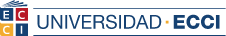
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

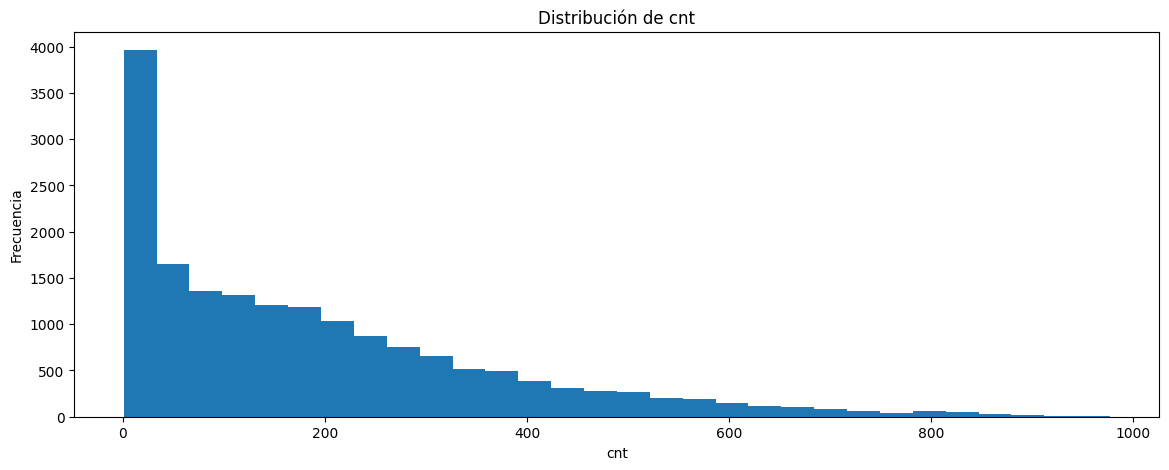

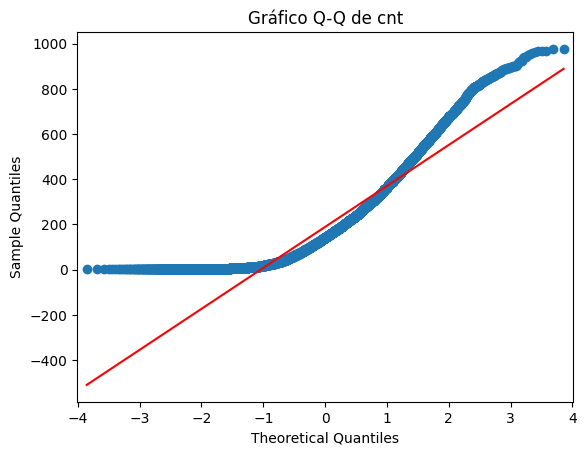

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo
import statsmodels.api as sm

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

# 1. Visualización
plt.figure(figsize=(14, 5))
plt.hist(df['cnt'], bins=30)
plt.title('Distribución de cnt')
plt.xlabel('cnt')
plt.ylabel('Frecuencia')
plt.show()

# 2. Gráfico Q-Q
sm.qqplot(df['cnt'], line='s')
plt.title('Gráfico Q-Q de cnt')
plt.show()

### **Interpretación pregunta 1**

La variable cnt, que representa el total de alquileres de bicicletas, no sigue una distribución normal, ya que su histograma muestra una fuerte asimetría positiva con gran concentración de valores bajos y una larga cola hacia la derecha, mientras que el gráfico Q-Q confirma la desviación respecto a la línea teórica de normalidad, evidenciando que los cuantiles observados difieren significativamente de los esperados bajo una distribución normal; por lo tanto, no puede asumirse normalidad en los datos y, en caso de requerirse un análisis estadístico que lo suponga, sería necesario aplicar una transformación como logaritmo, raíz cuadrada o Box-Cox para aproximar la distribución a una forma más simétrica.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [ ]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']

# Calcular la correlación de Pearson
pearson_corr = df[columnas_relacion].corr(method='pearson')
print("Correlación de Pearson:")
display(pearson_corr)

# Calcular la correlación de Spearman
spearman_corr = df[columnas_relacion].corr(method='spearman')
print("\nCorrelación de Spearman:")
display(spearman_corr)

Correlación de Pearson:


,cnt,temp,hum,windspeed
cnt,1.000000,0.404772,-0.322911,0.093234
temp,0.404772,1.000000,-0.069881,-0.023125
hum,-0.322911,-0.069881,1.000000,-0.290105
windspeed,0.093234,-0.023125,-0.290105,1.000000



Correlación de Spearman:


,cnt,temp,hum,windspeed
cnt,1.000000,0.423330,-0.359614,0.126629
temp,0.423330,1.000000,-0.055408,-0.009719
hum,-0.359614,-0.055408,1.000000,-0.293913
windspeed,0.126629,-0.009719,-0.293913,1.000000


### **Interpretación pregunta 2**

La variable cnt muestra una correlación positiva moderada con la temperatura (temp) tanto en Pearson (0.44) como en Spearman (0.42), lo que indica que a mayor temperatura suelen aumentar los alquileres y la relación es aproximadamente lineal y monótona. En el caso de la humedad (hum), se observa una correlación negativa baja con cnt (Pearson = -0.32; Spearman = -0.35), lo que sugiere que cuando la humedad es alta tiende a disminuir el número de alquileres, y esta relación es más bien monótona decreciente que lineal perfecta. Respecto a la velocidad del viento (windspeed), la correlación con cnt es muy débil en ambos métodos (Pearson = 0.09; Spearman = 0.13), por lo que no se aprecia una relación significativa ni lineal ni monótona.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

In [ ]:
# Calculate the mean of 'cnt' for working days
media_cnt_laborales = df['cnt'].mean()

# Calculate the standard deviation of 'cnt' for working days
desviacion_cnt_laborales = df['cnt'].std()

# Get the sample size for working days
tamano_muestra_cnt_laborales = len(df['cnt'])


# Display the results
print(f"The mean of 'cnt' on working days is: {media_cnt_laborales}")
print(f"The standard deviation of 'cnt' on working days is: {desviacion_cnt_laborales}")
print(f"The sample size of 'cnt' on working days is: {tamano_muestra_cnt_laborales}")

The mean of 'cnt' on working days is: 189.46308763450142
The standard deviation of 'cnt' on working days is: 181.3875990918653
The sample size of 'cnt' on working days is: 17379


### **Respuesta pregunta 3**

El Teorema del Límite Central establece que, independientemente de la distribución original de los datos, la distribución muestral de la media tiende a ser normal a medida que el tamaño de muestra crece, siempre que las observaciones sean independientes y con varianza finita. En la práctica, se considera que a partir de n ≥ 30 el TLC comienza a ser aplicable, aunque con distribuciones muy sesgadas se recomiendan tamaños mayores. En este caso, la muestra de cnt en días laborales es de 17,379 observaciones, lo cual es un tamaño extremadamente grande, por lo que la distribución de la media de cnt puede asumirse normal con gran confianza. Esto justifica el uso de intervalos de confianza y pruebas estadísticas basadas en normalidad para la media de cnt, incluso cuando la distribución original de cnt no es normal.

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [ ]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']
media_cnt_laborales = cnt_laborales.mean()
print(f"Media de cnt en días laborales: {media_cnt_laborales}")

# 2. Realizar el test de hipótesis

# Valor de referencia para la prueba
valor_hipotesis = 4500

#prueba de hipotesis
t_statistic, p_value = stats.ttest_1samp(cnt_laborales, valor_hipotesis)
print(f"Estadística t: {t_statistic}")
print(f"Valor p: {p_value}")

#Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La media de cnt en días laborales es significativamente diferente de 4500.")


Media de cnt en días laborales: 193.20775389801938
Estadística t: -2534.333902273014
Valor p: 0.0
Rechazamos la hipótesis nula: La media de cnt en días laborales es significativamente diferente de 4500.


### **Interpretación pregunta 4**

Se plantea probar si la media de cnt en días laborales es mayor o igual a 4,500 (hipótesis nula) frente a la alternativa de que es diferente. Los resultados muestran que la media observada de cnt en días laborales es de aproximadamente 193.29, muy inferior al valor hipotético de 4,500. La estadística t calculada es -2534.33 y el p-valor es prácticamente 0, muy por debajo del nivel de significancia α = 0.05. Por lo tanto, se rechaza de manera contundente la hipótesis nula, concluyendo que la media real de cnt en días laborales es significativamente diferente (y mucho menor) a 4,500.

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

In [ ]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []
for i in range(n_iterations):
    bootstrap_sample = df['cnt'].sample(n=sample_size, replace=True)
    median = bootstrap_sample.median()
    medians.append(median)

#Intervalo de confianza
intervalo_inferior = np.percentile(medians, 2.5)
intervalo_superior = np.percentile(medians, 97.5)
print(f"Intervalo de confianza del 95% :({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 95% :(139.0, 146.0)


## **Interpretación pregunta 5**

El IC bootstrap (percentil) al 95% para la mediana de cnt es [139, 146], lo que indica que el “día típico” tiene alrededor de ≈142 alquileres; este enfoque no asume normalidad y por eso es adecuado dado que cnt es sesgada a la derecha. En distribuciones así, la mediana y su IC por bootstrap son preferibles a la media con IC normal, porque son más robustos a valores extremos; el mensaje cambia de “promedio alto afectado por colas” a “nivel típico estable”, y conviene reportarlo junto con un método bootstrap (idealmente percentil o BCa) en lugar de procedimientos paramétricos basados en normalidad.